<a href="https://colab.research.google.com/github/vishrutjai/Deep-Learning/blob/master/DL_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image #import Python Image Library
import numpy as np
import os
import glob
import re
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split

os.chdir('/content/drive/My Drive')

In [0]:
path = os.path.abspath('.cnn.py')
path = re.sub('[a-zA-Z\s._]+$', '', path)
dirs = os.listdir(path+'Images/')
im_arr = []
lb_arr = []
X = []
for i in dirs:
    count = 0
    for pic in glob.glob(path+'Images/'+i+'/*.tif'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(256,256))
        im = np.array(im)
        count = count + 1
        X.append(im)
        if(count == 3):
            im_arr.append({str(i):im})
        lb_arr.append(i)

X = np.array(X)
y = np.array(lb_arr)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y_test = label_encoder.fit_transform(y_test)
y_train = label_encoder.fit_transform(y_train) 



In [52]:
y_train

array([18, 10,  4, ...,  5,  8,  0])

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, 21)
y_test = keras.utils.to_categorical(y_test, 21)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import SGD
#initializer = keras.initializers.lecun_uniform(seed=None)

model = Sequential() #model = sequential 
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #make layer flatten

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))
epochs = 25

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

'''datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, y_test))
'''
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 125, 125, 64)      73792     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 30, 30, 64)      

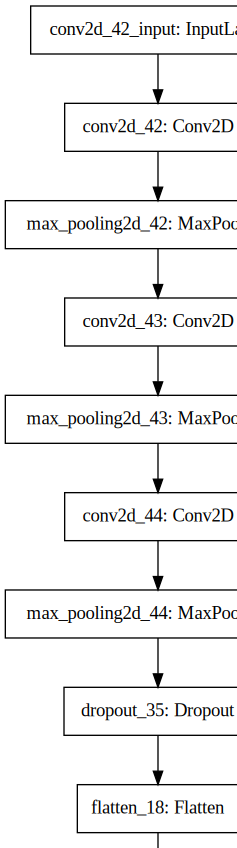

In [59]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

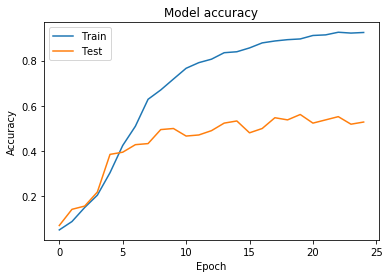

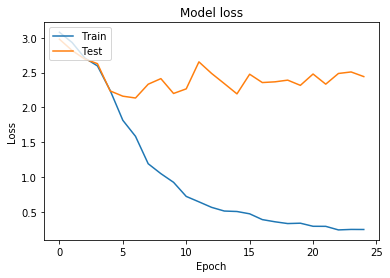

In [60]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()